# Motif plot

In [2]:
import pandas as pd

In [3]:
pssms = pd.read_parquet('out/all_site_pssms_filter.parquet')

In [4]:
df = pd.read_parquet('raw/kmeans_site_long_cluster_new.parquet')

In [9]:
pssms.shape

(1169, 943)

In [10]:
df.shape

(843252, 6)

In [11]:
df.columns

Index(['sub_site', 'site_seq', 'cluster_info', 'cluster', 'cluster_id',
       'cluster_new'],
      dtype='object')

In [12]:
cols=['sub_site','cluster_new']

In [13]:
df = df[cols]

In [14]:
info=pd.read_parquet('raw/kmeans_site.parquet')

In [15]:
info = info[['substrate_uniprot', 'substrate_genes', 'site', 'source','sub_site','site_seq']]

In [16]:
df = df.merge(info,on='sub_site')

In [17]:
df.columns

Index(['sub_site', 'cluster_new', 'substrate_uniprot', 'substrate_genes',
       'site', 'source', 'site_seq'],
      dtype='object')

In [18]:
new_colname = ['sub_site', 'cluster', 'uniprot', 'genes',
       'site', 'source', 'site_seq']

In [19]:
df.columns = new_colname

In [20]:
df = df[df.cluster.isin(pssms.index)]

In [21]:
df.shape

(751513, 7)

In [22]:
df = df.reset_index(drop=True)

In [90]:
df.to_parquet('out/web_motif_df.parquet')

In [6]:
df = pd.read_parquet('out/web_motif_df.parquet')

## Hierarchical clustering of merged pssms

In [21]:
from katlas.clustering import *

In [25]:
Z = get_Z(pssms)

  0%|          | 0/682696 [00:00<?, ?it/s]

In [23]:
count_map = df.cluster.value_counts()

In [27]:
labels= get_pssm_seq_labels(pssms,count_map = count_map , thr=0.3)

In [28]:
labels[:4]

['29 (n=8,243): ....................s*P...................',
 '369 (n=6,453): ....................s*.s..................',
 '1054 (n=6,368): ....................t*P...................',
 '338 (n=6,182): .................R..s*....................']

In [36]:
from katlas.plot import *
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [41]:
def plot_dendrogram(Z,
                    color_thr=0.07,
                    dense=7, # the higher the more dense for each row
                    line_width=1,
                    # title='Hierarchical Clustering Dendrogram',
                    scale=1,
                    **kwargs):
    length = (len(Z) + 1) // dense
    
    plt.figure(figsize=(5*scale,length*scale))
    with plt.rc_context({'lines.linewidth': line_width}):
        dendrogram(
            Z,
            orientation='left',
            leaf_font_size=18, #7
            color_threshold=color_thr,
            **kwargs
        )

    ax = plt.gca()
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)

In [43]:
plot_dendrogram(Z,labels=labels,color_thr=0.07,scale=2.5)
# save_pdf('out/dendrogram.pdf')
save_svg('out/human_motif_dendrogram.svg')
plt.close()

## All motif

In [30]:
import pandas as pd
from katlas.plot import *
from katlas.pssm import *
from katlas.utils import *
from tqdm import tqdm
import gc
from matplotlib import pyplot as plt

In [7]:
pssms = pd.read_parquet('out/all_site_pssms_filter.parquet')

In [8]:
df = pd.read_parquet('out/web_motif_df.parquet')

In [10]:
cnt = df.cluster.value_counts()

In [19]:
# cnt.index.get_loc(1198)

1146

In [28]:
def save_show(path=None, # image path, e.g., img.svg, if not None, will save, else plt.show()
              show_only=False,
             ):
    "Show plot or save path"
    if show_only: plt.show()
    elif path is not None: plt.savefig(path, bbox_inches='tight', pad_inches=0.05,transparent=True)
    else: plt.show()
    plt.close('all')

In [31]:
for idx,row in tqdm(pssms.iterrows(),total=len(pssms)):
    plot_logo_heatmap(recover_pssm(row),title=f'Motif #{idx} (n={cnt[idx]})')
    path=prepare_path(f'fig/motif/{idx}/pssm.svg')
    save_show(path,show_only=False)

  2%|█▊                                                                                          | 23/1169 [01:07<56:28,  2.96s/it]


## Pathway for each motif

In [34]:
from katlas.pathway import *
from katlas.utils import *

In [35]:
cnt = df.cluster.value_counts()

In [40]:
# for idx in [545,
#             1058,
#             913,
#             597,
#             1231]:
#     df_motif = df[df.cluster==idx].copy()
#     gene_list = df_motif.genes.str.split(' ').str[0].dropna().drop_duplicates().tolist()
#     try:
#         df_path = get_reactome(gene_list,p_type='p')
#         df_path = df_path[~df_path.name.str.contains('GTPase|SUMO',case=False,na=False)].copy()
#         path = prepare_path(f'fig/motif/{idx}/path.parquet')
#         df_path.to_parquet(path)
#     except Exception as e:
#         print(f"Failed for {idx}: {e}")

Running pathway anlysis
Done
Failed for 1231: "None of [Index(['name', 'stId', 'entities.pValue'], dtype='object')] are in the [columns]"


In [36]:
for idx in cnt.index:
    df_motif = df[df.cluster==idx].copy()
    gene_list = df_motif.genes.str.split(' ').str[0].dropna().drop_duplicates().tolist()
    try:
        df_path = get_reactome(gene_list,p_type='p')
        df_path = df_path[~df_path.name.str.contains('GTPase|SUMO',case=False,na=False)].copy()
        path = prepare_path(f'fig/motif/{idx}/path.parquet')
        df_path.to_parquet(path)
    except Exception as e:
        print(f"Failed for {idx}: {e}")
    # break

Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathway anlysis
Done
Running pathwa

In [44]:
pssms

-20P      -20G      -20A      -20C      -20S      -20T  \
cluster_new                                                               
29           0.068293  0.056220  0.061707  0.018293  0.064512  0.043171   
369          0.077786  0.067810  0.065004  0.012783  0.071551  0.039439   
1054         0.088742  0.063003  0.074057  0.011843  0.064424  0.045476   
338          0.076785  0.070604  0.071254  0.012201  0.072718  0.043273   
427          0.076803  0.062933  0.069868  0.010749  0.071255  0.046637   
...               ...       ...       ...       ...       ...       ...   
539          0.022727  0.000000  0.000000  0.000000  0.068182  0.000000   
131          0.000000  0.136364  0.045455  0.068182  0.022727  0.045455   
538          0.071429  0.000000  0.023810  0.000000  0.023810  0.047619   
1207         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1224         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                 -20V      -20I      -20L      -20M  ...       20H       20K  \
cluster_new                                          ...                       
29           0.049878  0.039756  0.092317  0.021463  ...  0.025225  0.067633   
369          0.046610  0.033359  0.083087  0.015900  ...  0.026542  0.064012   
1054         0.055582  0.033633  0.075162  0.021159  ...  0.022461  0.074185   
338          0.052546  0.035627  0.088661  0.019847  ...  0.022975  0.062082   
427          0.047330  0.033807  0.076456  0.019071  ...  0.023582  0.060864   
...               ...       ...       ...       ...  ...       ...       ...   
539          0.068182  0.295455  0.090909  0.022727  ...  0.022727  0.090909   
131          0.022727  0.000000  0.000000  0.000000  ...  0.000000  0.068182   
538          0.047619  0.023810  0.476190  0.000000  ...  0.000000  0.071429   
1207         0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1224         0.000000  0.000000  0.000000  0.000000  ...  0.023810  0.023810   

                  20R       20Q       20N       20D       20E      20pS  \
cluster_new                                                               
29           0.054838  0.047161  0.038874  0.058250  0.083841  0.028516   
369          0.069945  0.046214  0.036222  0.049180  0.084309  0.052771   
1054         0.059633  0.050775  0.027365  0.051882  0.071813  0.043499   
338          0.069741  0.047091  0.034382  0.040574  0.074466  0.042529   
427          0.063465  0.050460  0.035200  0.055141  0.081498  0.052540   
...               ...       ...       ...       ...       ...       ...   
539          0.000000  0.000000  0.000000  0.000000  0.045455  0.000000   
131          0.090909  0.000000  0.022727  0.272727  0.045455  0.045455   
538          0.119048  0.095238  0.214286  0.023810  0.119048  0.047619   
1207         0.047619  0.119048  0.000000  0.047619  0.071429  0.047619   
1224         0.000000  0.000000  0.023810  0.047619  0.166667  0.023810   

                 20pT      20pY  
cluster_new                      
29           0.007677  0.002315  
369          0.017018  0.002342  
1054         0.017083  0.004587  
338          0.010754  0.002933  
427          0.013005  0.003468  
...               ...       ...  
539          0.000000  0.000000  
131          0.022727  0.000000  
538          0.000000  0.023810  
1207         0.000000  0.023810  
1224         0.000000  0.000000  

[1169 rows x 943 columns]

## Special motifs

### Customized

In [94]:
from katlas.pssm import *

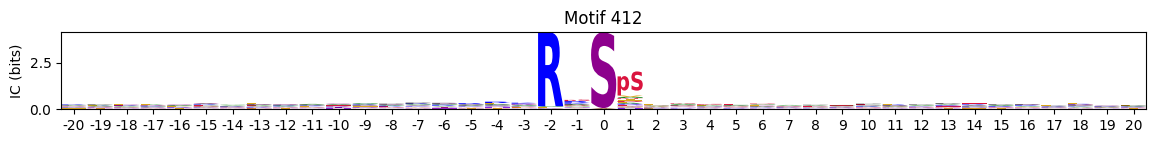

In [101]:
plot_logos_idx(pssms,412)

### Most common

In [102]:
cluster_cnt = df.cluster.value_counts()

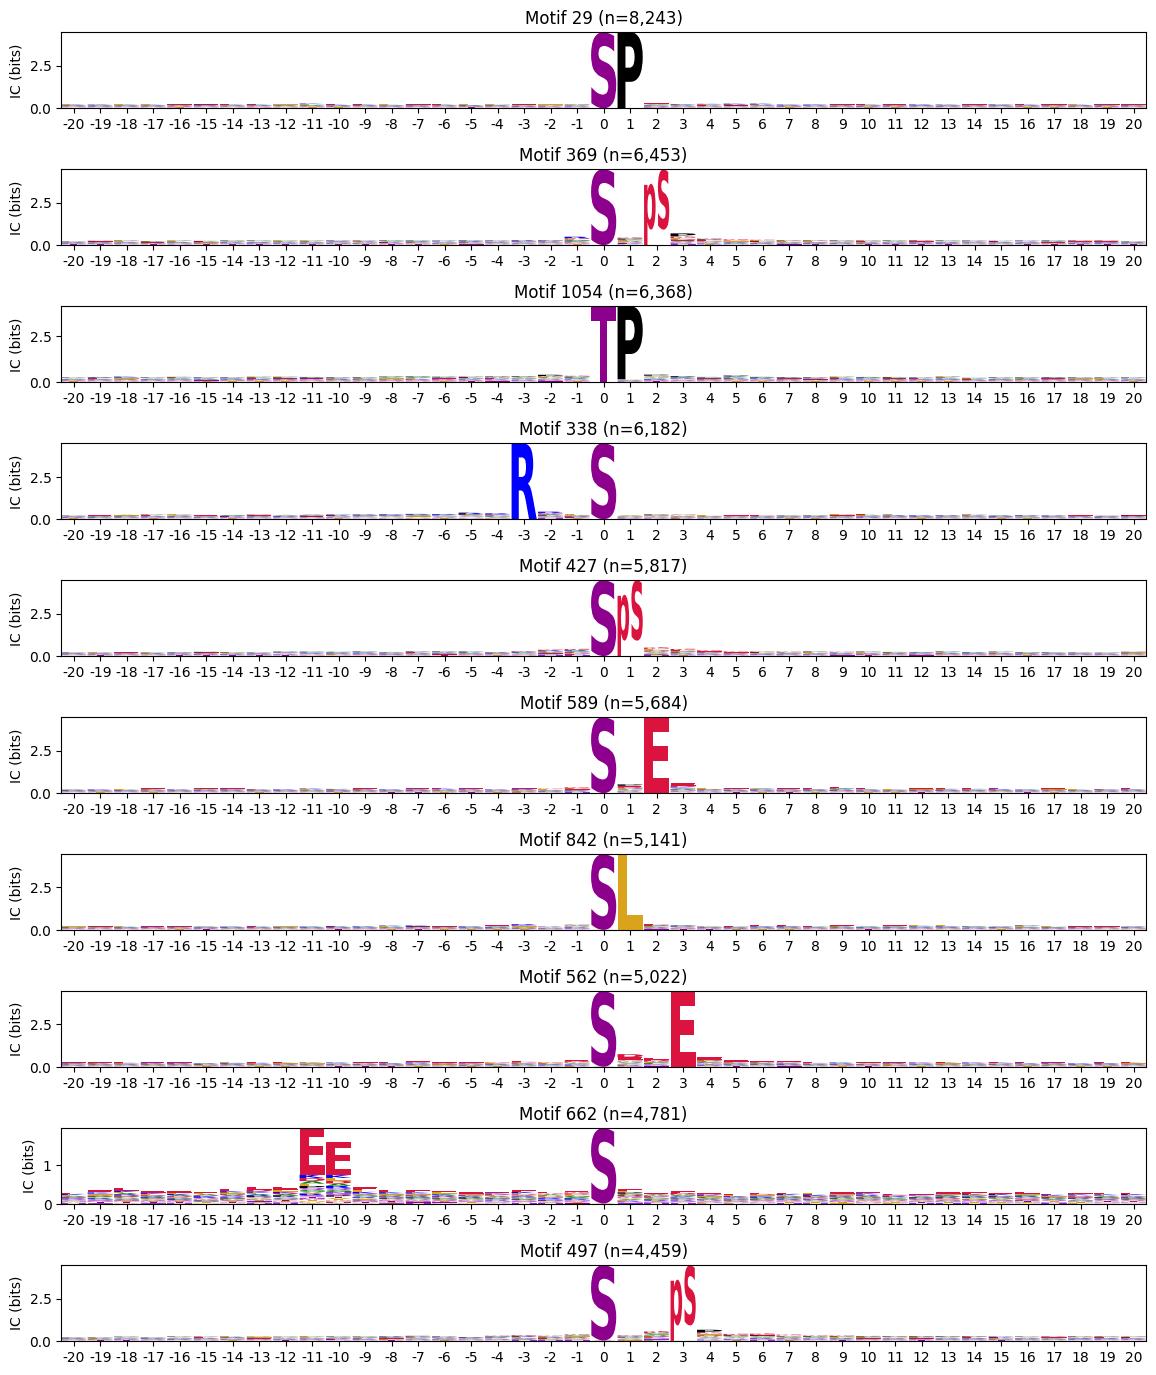

In [103]:
plot_logos(pssms.head(10),count_dict=cluster_cnt)

### Most common y

In [104]:
pssms_y = pssms[pssms['0pY']>0.3].copy()

In [105]:
idxs_y = pssms_y.index

In [107]:
len(idxs_y)

19

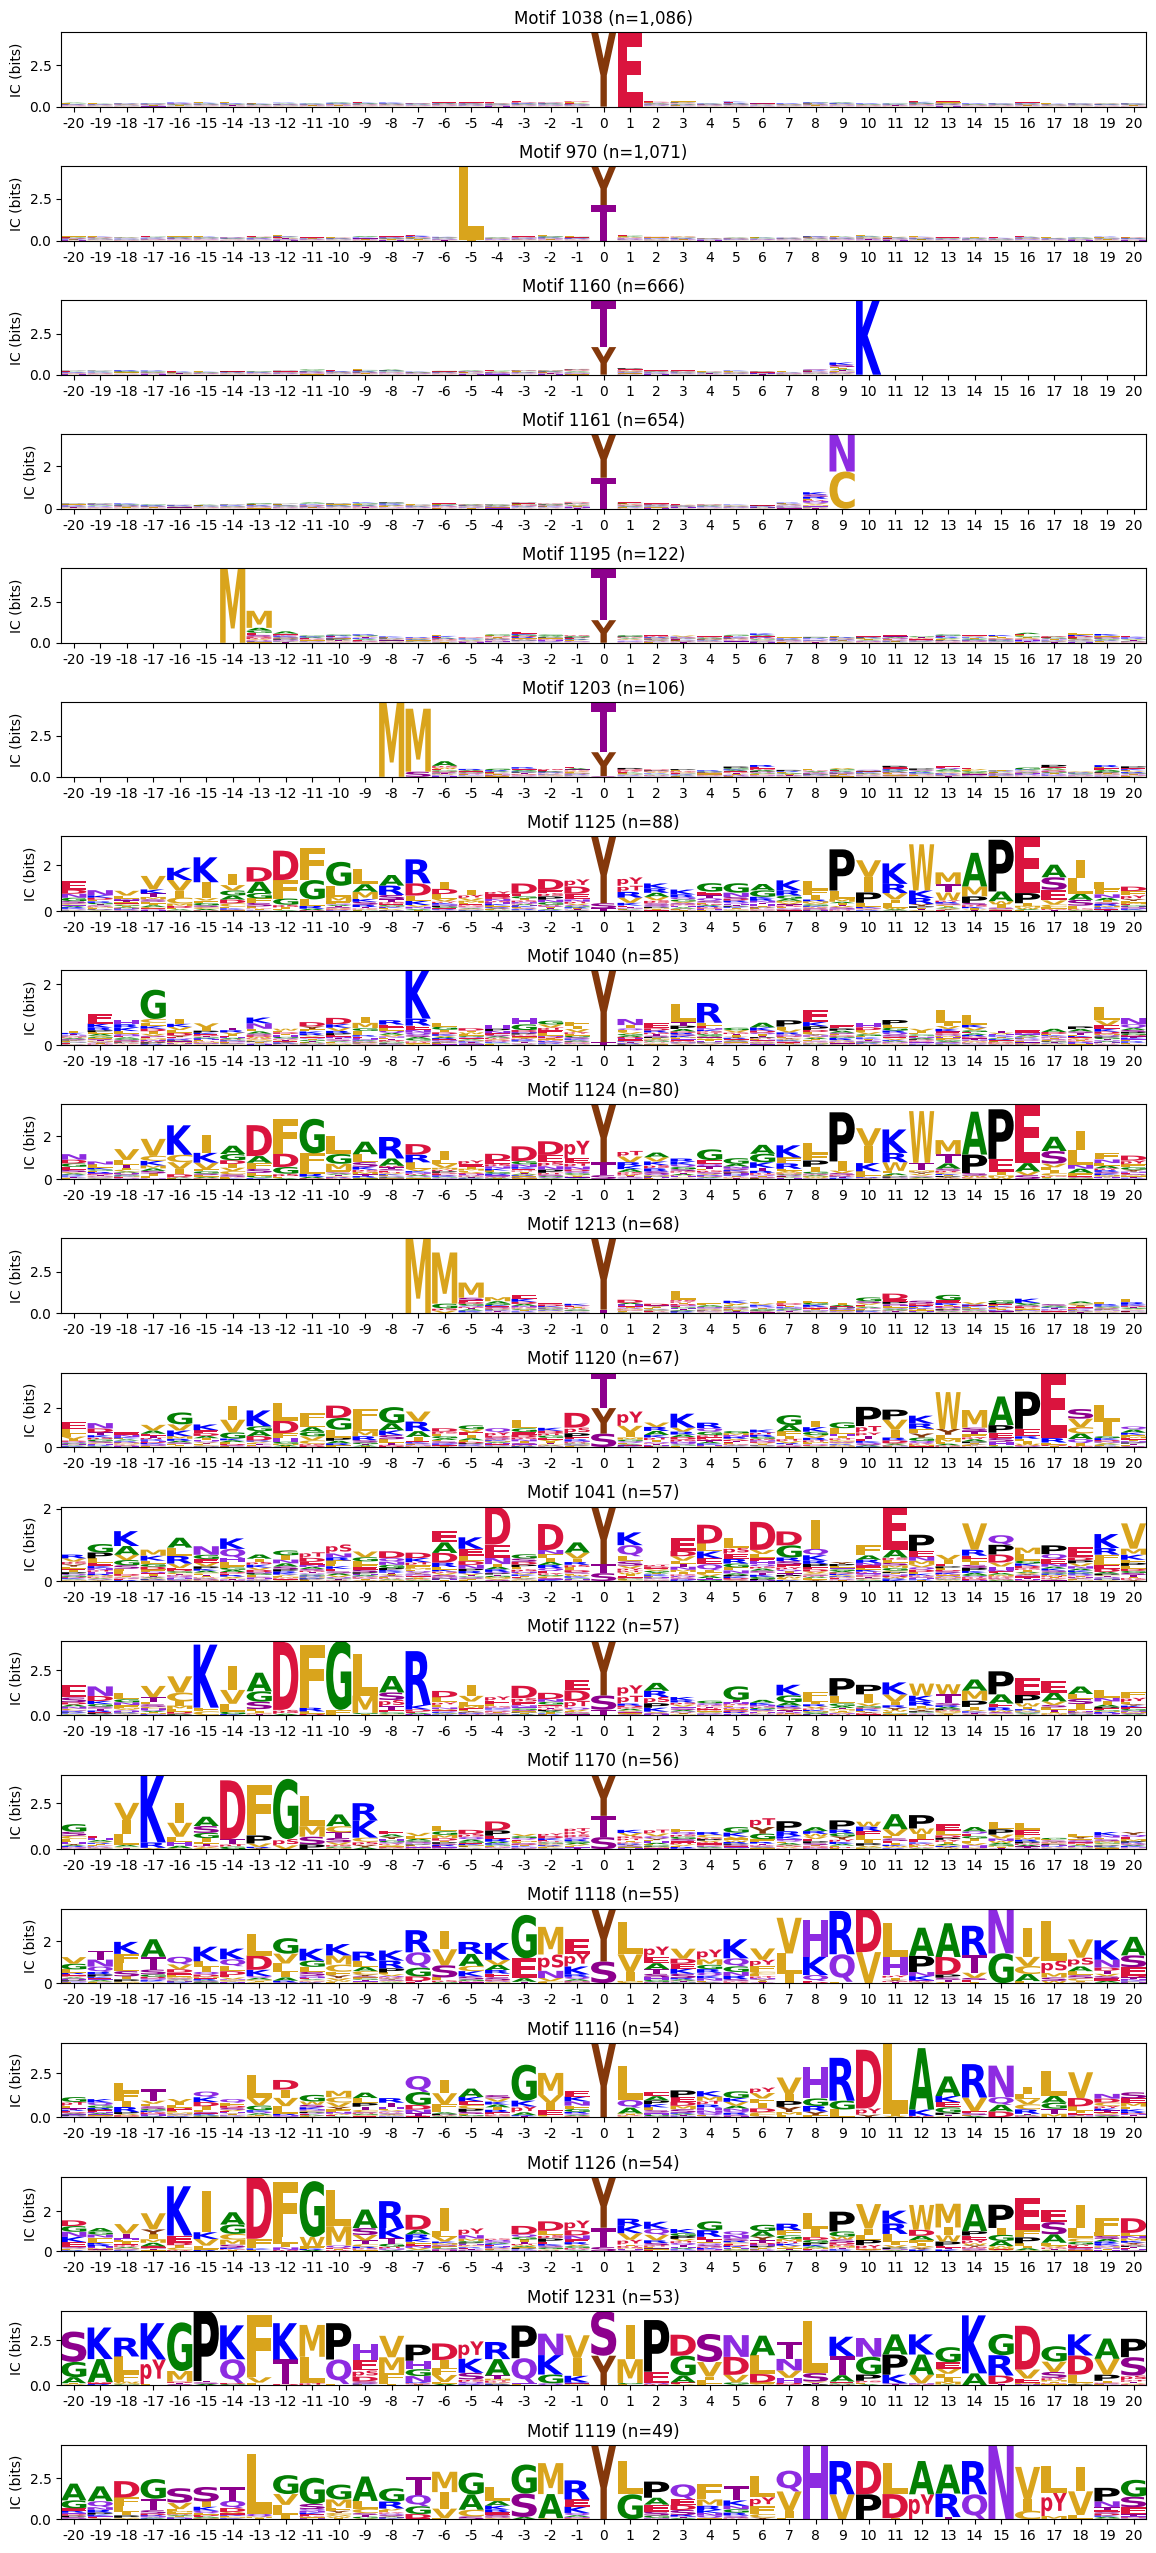

In [108]:
plot_logos(pssms.loc[idxs_y],count_dict=cluster_cnt)

### Highest IC sum

In [109]:
ICs = pssms.apply(lambda r: sum(get_IC_flat(r)) ,axis=1)

In [110]:
idxs=ICs.sort_values(ascending=False).head(20).index

The first one is mostly Zinc finger protein

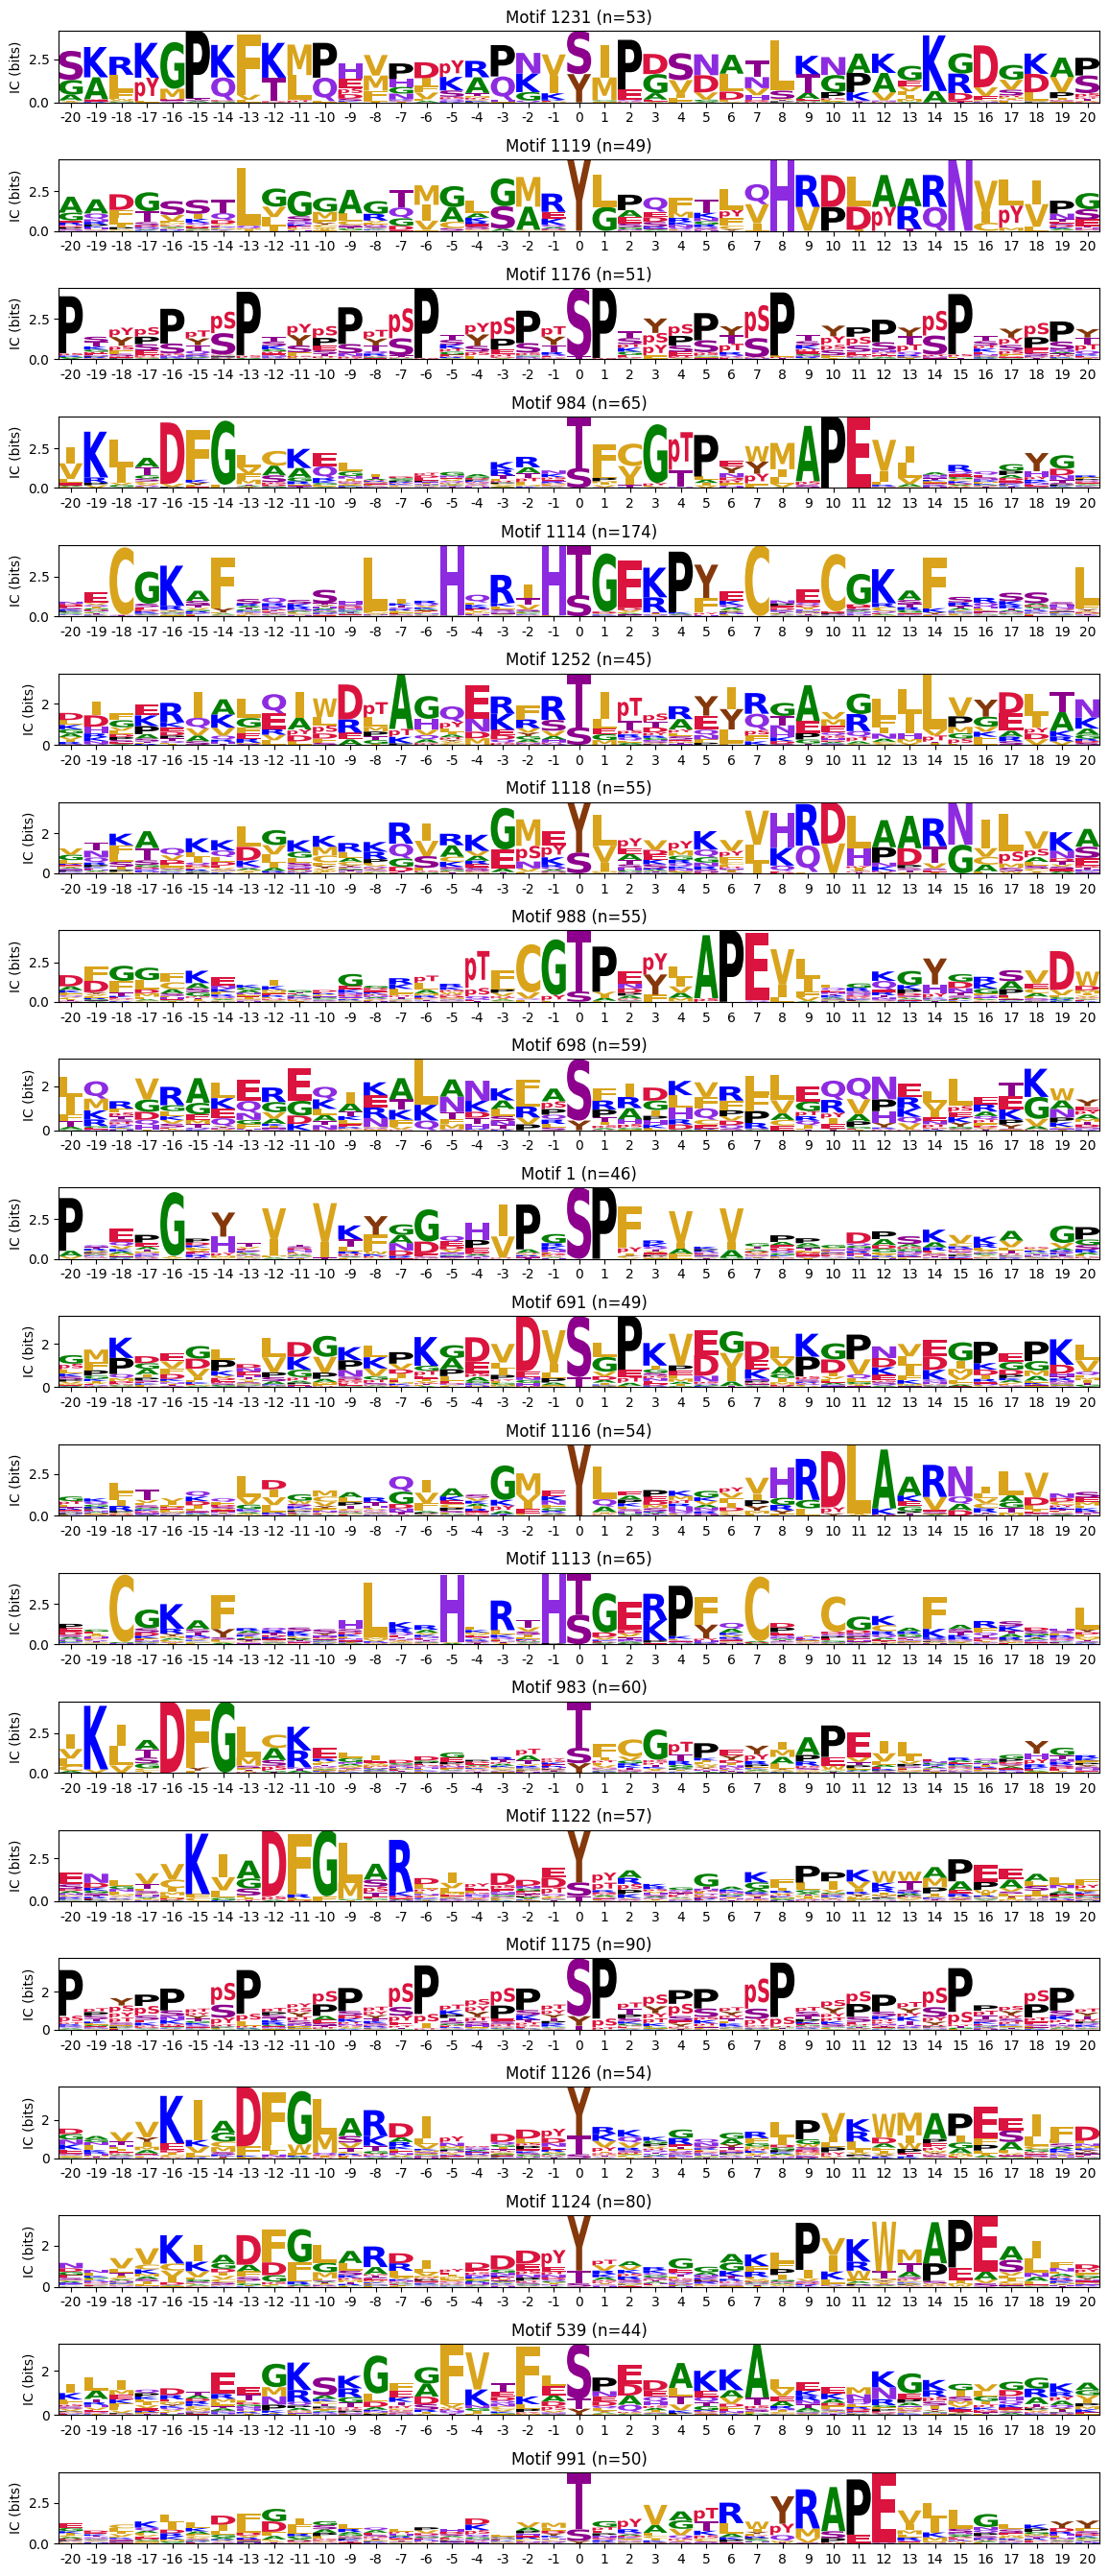

In [111]:
plot_logos(pssms.loc[idxs],count_dict=cluster_cnt)

### C-terminal motifs

In [112]:
zeros_right = pssms.apply(lambda r: (recover_pssm(r).loc[:,1:].sum()==0).sum() , axis=1)

In [113]:
zeros_right_idxs = zeros_right[zeros_right>0].index

In [114]:
zeros_right_idxs

Index([1150, 1164, 1160, 1134, 1161, 1137, 1140, 1159, 1163, 1155, 1141, 1158,
       1136, 1165],
      dtype='int64', name='cluster_new')

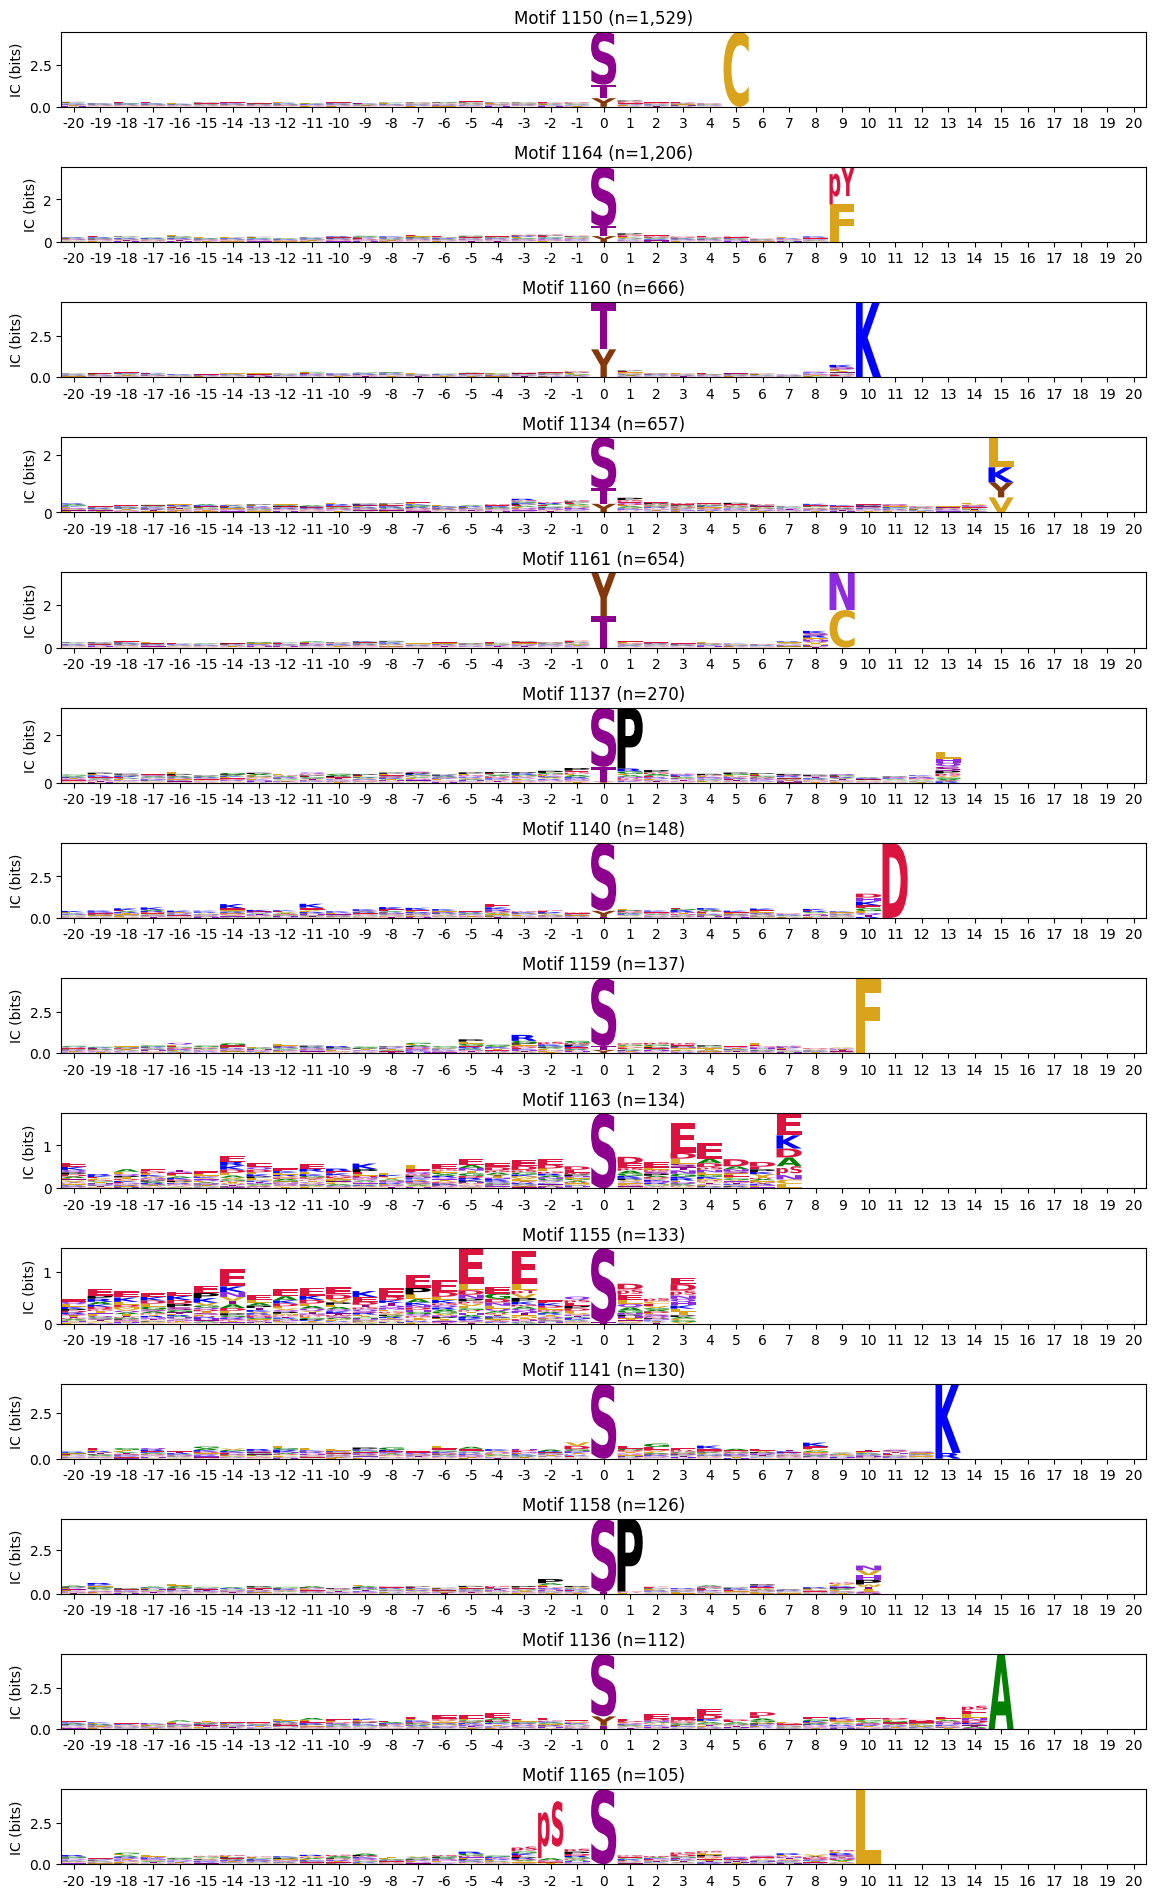

In [115]:
plot_logos(pssms.loc[zeros_right_idxs],count_dict=cluster_cnt)

### N-Terminal motifs:

In [116]:
zeros_left = pssms.apply(lambda r: (recover_pssm(r).loc[:,:0].sum()==0).sum() , axis=1)

In [117]:
zeros_left_idxs = zeros_left[zeros_left>0].index

In [118]:
idxs = zeros_left_idxs[:10]

In [119]:
# zeros = pssms.apply(lambda r: (recover_pssm(r).sum()==0).sum() , axis=1)

# idxs = zeros.sort_values(ascending=False).head(10).index

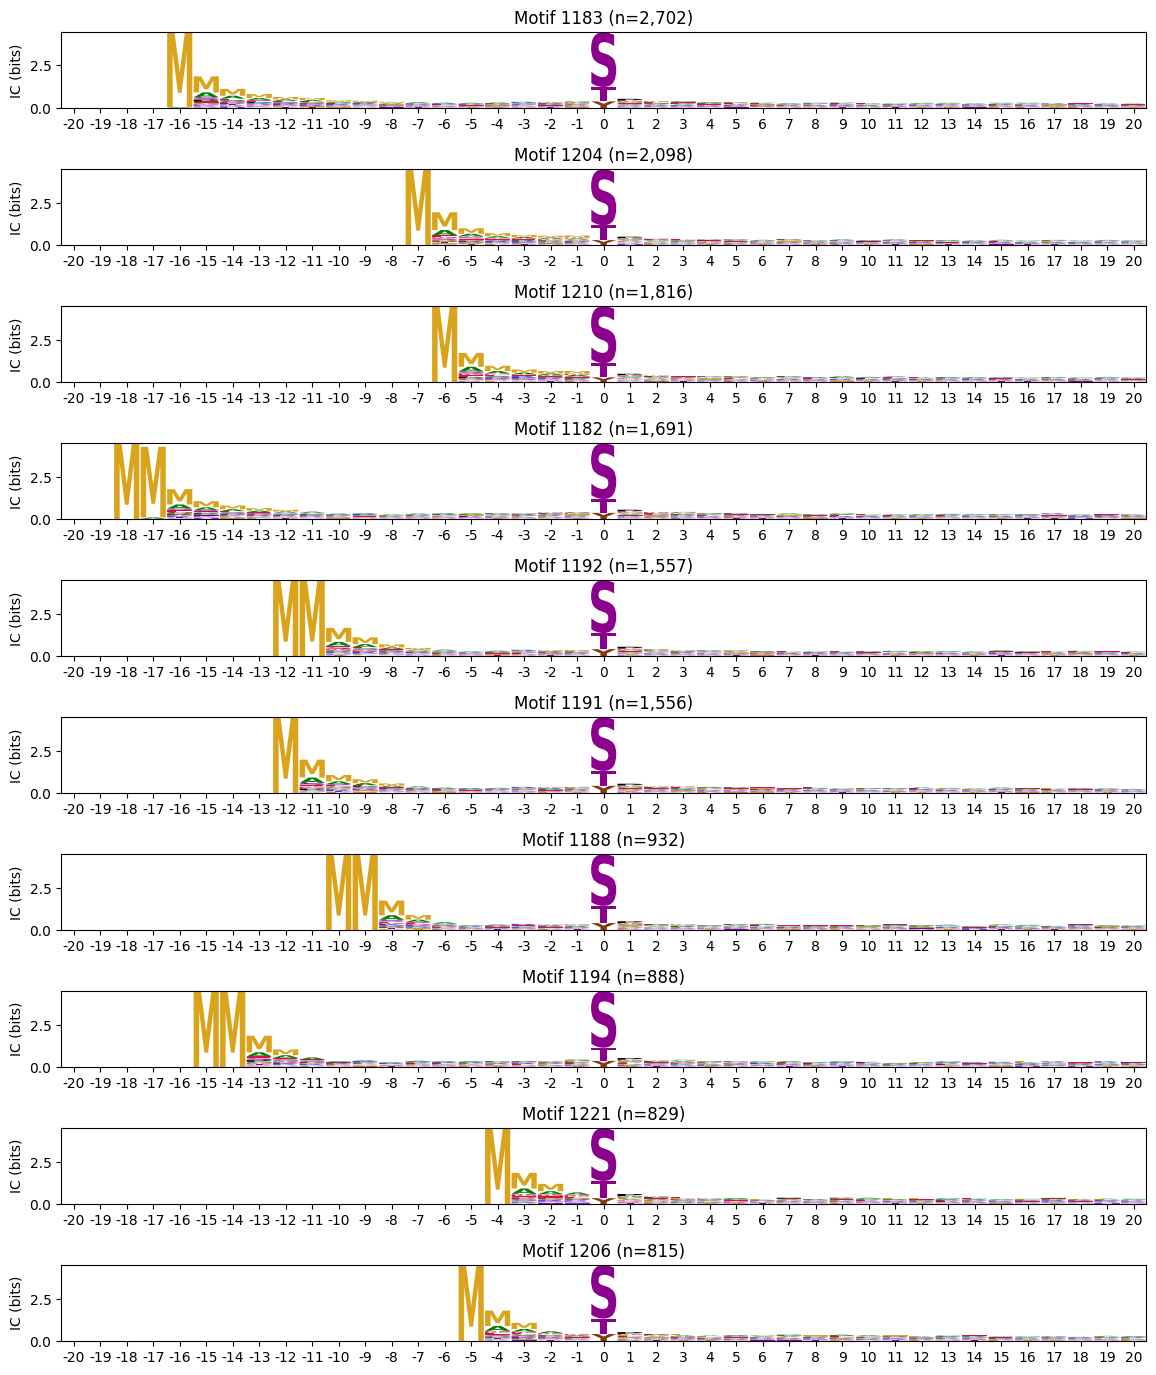

In [120]:
plot_logos(pssms.loc[idxs],count_dict=cluster_cnt)